# Assignment 1
This jupyter notebook is meant to be used in conjunction with the full questions in the assignment pdf.

## Instructions
- Write your code and analyses in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of the other cells.

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>.ipynb` and submit ONLY the notebook file on moodle.

### Environment setup

The following code reads the train and test data (provided along with this template) and outputs the data and labels as numpy arrays. Use these variables in your code.

---
#### Note on conventions
In mathematical notation, the convention is tha data matrices are column-indexed, which means that a input data $x$ has shape $[d, n]$, where $d$ is the number of dimensions and $n$ is the number of data points, respectively.

Programming languages have a slightly different convention. Data matrices are of shape $[n, d]$. This has the benefit of being able to access the ith data point as a simple `data[i]`.

What this means is that you need to be careful about your handling of matrix dimensions. For example, while the covariance matrix (of shape $[d,d]$) for input data $x$ is calculated as $(x-u)(x-u)^T$, while programming you would do $(x-u)^T(x-u)$ to get the correct output shapes.

In [1]:
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt

def read_data(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
    
    num_points = len(lines)
    dim_points = 28 * 28
    data = np.empty((num_points, dim_points))
    labels = np.empty(num_points)
    
    for ind, line in enumerate(lines):
        num = line.split(',')
        labels[ind] = int(num[0])
        data[ind] = [ int(x) for x in num[1:] ]
        
    return (data, labels)

train_data, train_labels = read_data("sample_train.csv")
test_data, test_labels = read_data("sample_test.csv")
print(train_data.shape, test_data.shape)
print(train_labels.shape, test_labels.shape)

(6000, 784) (1000, 784)
(6000,) (1000,)


# Questions
---
## 1.3.1 Representation
The next code cells, when run, should plot the eigen value spectrum of the covariance matrices corresponding to the mentioned samples. Normalize the eigen value spectrum and only show the first 100 values.

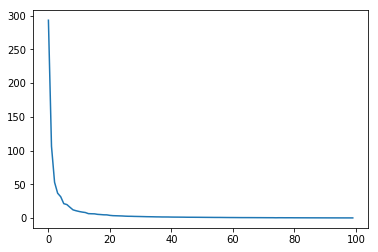

In [2]:
rollno=[]
for i in range(6000):
    if(train_labels[i]==1):
        rollno.append(train_data[i])
        
rollno=np.array(rollno)
rollno=rollno.T
C=np.cov(rollno)
E=np.linalg.eigvals(C)
E=E.real
EM=np.mean(E)
X=np.arange(100)

plt.plot(X,E[0:100]/EM)
plt.show()

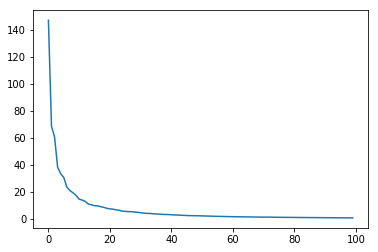

In [3]:
rollno=[]
for i in range(6000):
    if(train_labels[i]==5):
        rollno.append(train_data[i])
        
rollno=np.array(rollno)
rollno=rollno.T
C=np.cov(rollno)
E=np.linalg.eigvals(C)
E=E.real
EM=np.mean(E)
X=np.arange(100)

plt.plot(X,E[0:100]/EM)
plt.show()


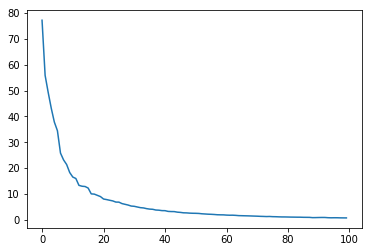

In [4]:
rollno=[]
for i in range(6000):
        rollno.append(train_data[i])
        
rollno=np.array(rollno)
rollno=rollno.T
C=np.cov(rollno)
E=np.linalg.eigvals(C)
E=E.real
EM=np.mean(E)
X=np.arange(100)

plt.plot(X,E[0:100]/EM)
plt.show()


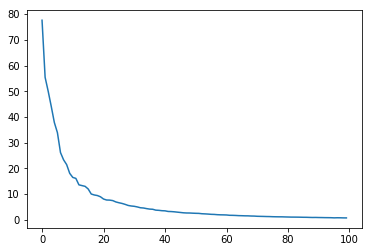

In [5]:
index = np.random.choice(6000,3000,replace=False)  
rollno=train_data[index]  

rollno=np.array(rollno)
rollno=rollno.T
C=np.cov(rollno)
E=np.linalg.eigvals(C)
E=E.real
EM=np.mean(E)
X=np.arange(100)

plt.plot(X,E[0:100]/EM)
plt.show()


### 1.3.1 Question 1
- Are plots a and b different? Why?
- Are plots b and c different? Why?
- What are the approximate ranks of each plot?

### Answer to 1.3.1 Question 1

#### A)
The plota of a) and b) are similar. This is because most of the information of the covariance matrix is stored in larger eigen values.
#### B)
Since c) has data of all the classes, it has more variation than a single class, and thus it has more number of eigen values which are significantly greater than 0. This also increases the spread of the spectrum for c) part.
#### C)
Approximate ranks can be found by checking the point where graph almost tends to 0.
<br>
a) 40<br>
b) 60<br>
c) 90<br>
d) 90<br>


### 1.3.1 Question 2
- How many possible images could there be?
- What percentage is accessible to us as MNIST data?
- If we had acces to all the data, how would the eigen value spectrum of the covariance matrix look?

### Answer to 1.3.1 Question 2

#### A)
Since all samples in $R^{784}$ and have values in set {0,1}, total number of images possible would be $2^{784}$.
#### B)
Percentage of data accessible to us is :<br>
\begin{equation*}
    \frac{Data Available}{Total Data}\times 100
\end{equation*}
<br>
\begin{equation*}
    =\frac{7000}{2^{784}}\times 100 \approx 0
\end{equation*}
#### C)
Since we would have relativey less number of eigen values which were to be significantly greater than 0, we can expect eigen spectrum to be similar to a line parallel to x axis.


## 1.3.2 Linear Transformation
---
### 1.3.2 Question 1
How does the eigen spectrum change if the original data was multiplied by an orthonormal matrix? Answer analytically and then also validate experimentally.

### Answer to 1.3.2 Question 1
The eigen-value spectrum will not change which can be confirmed by:<br><br>
\begin{equation}
    \Sigma = \frac{1}{N} \sum_{i=1}^{N}(x-\mu)(x-\mu)^{T}
\end{equation}

When we multiply $x$ with $A$ such that $AA^{T} = I$

\begin{equation}
    \Sigma^{'} = \frac{1}{N} \sum_{i=1}^{N}(Ax-\mu)(Ax-\mu)^{T}
    {} = \frac{1}{N} \sum_{i=1}^{N}A(x-\mu)(x-\mu)^{T}A^{T}
    {} = A \Sigma A^{T}
\end{equation}

And since $\Sigma^{'}$ and $\Sigma$ are similar, eigen values will be same.


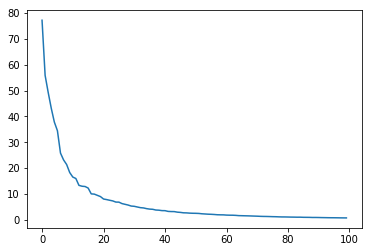

In [6]:
T=np.random.rand(784,784)
# T=np.random.rand(6000,6000)
Q,R=np.linalg.qr(T)
rollno=np.matmul(train_data,Q)
# rollno=np.matmul(train_data.T,Q)

rollno=np.array(rollno)
rollno=rollno.T
C=np.cov(rollno)
E=np.linalg.eigvals(C)
E=E.real
EM=np.mean(E)
X=np.arange(100)

plt.plot(X,E[0:100]/EM)
plt.show()


### 1.3.2 Question 2
If  samples  were  multiplied  by  784 × 784  matrix  of rank 1 or 2, (rank deficient matrices), how will the eigen spectrum look like?

### Answer to 1.3.2 Question 2
If we multiply with a rank defficient matrix of rank 1 or 2 then this would result in loss of eigen values and the resultant number of eigen values would be max 2. Duw to this the eigen spectrum would have few peaks and would be zero elsewhere.

### 1.3.2 Question 3
Project the original data into the first and second eigenvectors and plot in 2D

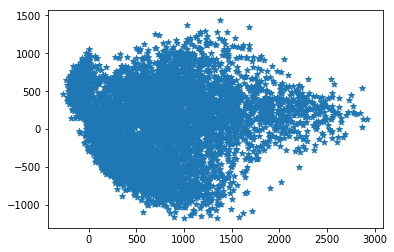

In [7]:
T=train_data.T
C=np.cov(T)
E,V=np.linalg.eig(C)
E=E.real
V=V.real
X=[]
Y=[]
for i in range(6000):
    X.append(np.matmul(T[:,i].T,V[:,0]))
    Y.append(np.matmul(T[:,i].T,V[:,1]))
plt.scatter(X,Y,marker='*')
plt.show()

## 1.3.3 Probabilistic View
---
In this section you will classify the test set by fitting multivariate gaussians on the train set, with different choices for decision boundaries. On running, your code should print the accuracy on your test set.

In [8]:
# Print accuracy on the test set using MLE

# Calculating mean and covariance of all classes
M=[]
C=[]
for i in range(10):
    temp=[]
    for j in range(len(train_labels)):
        x=train_labels[j]
        if(x==i):
            temp.append(train_data[j])
    temp=np.array(temp)
    M.append(np.mean(temp,axis=0))
    C.append(np.cov(temp.T))
    
# precomputing inverses for fast calculations
inv=[]
for i in range(10):
    inv.append(np.linalg.pinv(C[i]))
    
# Calculating min
count=0
index=0
for i in test_data:
    minval=float('inf')
    minind=0
    for j in range(10):
        #Mahalanobis distance
        temp=np.dot(np.dot(i-M[j],inv[j]),(i-M[j]).T)
        if minval > temp:
            minval=temp
            minind=j
    if(minind == test_labels[index]):
        count+=1
    index+=1     
print('Accuracy is ~ '+str(count/10)+'%')

Accuracy is ~ 74.4%


In [9]:
# Print accuracy on the test set using MAP
# (assume a reasonable prior and mention it in the comments)

# Since there are 10 classes, so it is safe to assume that any point can lie
# in any of the classes. So probability of a point to be in a class is
# inv(no. of classes). Hence we can take P(theta) as 1/10
Ptheta=1/10

# Calculating mean and covariance of all classes
M=[]
C=[]
for i in range(10):
    temp=[]
    for j in range(len(train_labels)):
        x=train_labels[j]
        if(x==i):
            temp.append(train_data[j])
    temp=np.array(temp)
    M.append(np.mean(temp,axis=0))
    C.append(np.cov(temp.T))
    
# precomputing inverses for fast calculations
inv=[]
for i in range(10):
    inv.append(np.linalg.pinv(C[i]))
    
# Calculating min
count=0
index=0
for i in test_data:
    minval=float('inf')
    minind=0
    for j in range(10):
        #Mahalanobis distance
        temp=np.dot(np.dot(i-M[j],inv[j]),(i-M[j]).T)
        temp=temp*Ptheta
        if minval > temp:
            minval=temp
            minind=j
    if(minind == test_labels[index]):
        count+=1
    index+=1     
print('Accuracy is ~ '+str(count/10)+'%')

Accuracy is ~ 74.4%


In [10]:
# Print accuracy using Bayesian pairwise majority voting method

# Calculating mean and covariance of all classes
M=[]
C=[]
for i in range(10):
    temp=[]
    for j in range(len(train_labels)):
        x=train_labels[j]
        if(x==i):
            temp.append(train_data[j])
    temp=np.array(temp)
    M.append(np.mean(temp,axis=0))
    C.append(np.cov(temp.T))
    
# precomputing inverses for fast calculations
inv=[]
for i in range(10):
    for j in range(10):
        inv.append(np.linalg.pinv((C[i]+C[j])/2))
    
count=0
for i in range(len(test_data)):
    print(i)
    x=test_data[i]
    digit=[0,0,0,0,0,0,0,0,0,0]
    for j in range(1,10,1):
        for k in range(j+1,10,1):
            d1=np.dot(np.dot(x-M[j],inv[j*10+k]),(x-M[j]).T)
            d2=np.dot(np.dot(x-M[k],inv[j*10+k]),(x-M[k]).T)
            if(d1>d2):
                digit[k]+=1
            else:
                digit[j]+=1
    y=digit.index(max(digit))
    if(y==test_labels[i]):
        count+=1
# print(count)
print('Accuracy is ~ '+str(count/10)+'%')    


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [19]:
# Print accuracy using Simple Perpendicular Bisector majority voting method

# Calculating mean
M=[]
for i in range(10):
    temp=[]
    for j in range(len(train_labels)):
        x=train_labels[j]
        if(x==i):
            temp.append(train_data[j])
    temp=np.array(temp)
    M.append(np.mean(temp,axis=0))

# KNN
count=0
for i in range(len(test_data)):
    x=test_data[i]
    digit=[0,0,0,0,0,0,0,0,0,0]
    for j in range(1,10,1):
        for k in range(j+1,10,1):
            d1 = np.linalg.norm(x-M[j])
            d2 = np.linalg.norm(x-M[k])
            if(d1>d2):
                digit[k]+=1
            else:
                digit[j]+=1
    y=digit.index(max(digit))
    if(y==test_labels[i]):
        count+=1
print (count)
print('Accuracy is ~ '+str(count/10)+'%') 

687
Accuracy is ~ 68.7%


### 1.3.3 Question 4
Compare performances and salient observations

### Answer to 1.3.3 Question 4
- In MAP I have assumed that a sample is equilly likely to be in any class and hence it has a probability of 0.1 to be in any class. Duw to this MAP and MLE give same accuracy.
- Since perpendicular bisector concept is extended from 2-D, the only difference between **bayesian pairvise voting method** and **simple perpendicular bisector majority voting method** is that in first we have used mahalanobis distance and in second we have used euclidean distance. 
- In bayesian pairvise voting method, we assume that the variance of both the distributions are same which is a good enough approximation as the decision boundary is now a line(not quadratic) and hence accuracy is high.
- Performances of various algorithms will change greatly if data is made non uniform in terms of classes.

## 1.3.4 Nearest Neighbour based Tasks and Design
---
### 1.3.4 Question 1 : NN Classification with various K
Implement a KNN classifier and print accuracies on the test set with K=1,3,7

In [11]:
def mode(array):
    most = max(list(map(array.count, array)))
    return list(set(filter(lambda x: array.count(x) == most, array)))

for k in [1,3,7]:
    finalanswer=[]
    for i in range(1000):
        dist=[]
        answer=[]
        cur=test_data[i]
        for j in range(6000):
            dist.append([np.linalg.norm(cur-train_data[j]),j])
        dist.sort()
        dist.pop(0)
        for i in range(k):
            answer.append(train_labels[dist[i][1]])
        answer.sort()
        finalanswer.append(mode(answer))

    # print(finalanswer)
    count=0
    for i in range(1000):
        if(test_labels[i] in finalanswer[i]):
            count=count+1

    print('Accuracy for k='+str(k))
    print(count/10)

Accuracy for k=1
90.1
Accuracy for k=3
92.1
Accuracy for k=7
91.8


### 1.3.4 Question 1 continued
- Why / why not are the accuracies the same?
- How do we identify the best K? Suggest a computational procedure with a logical explanation.

### Answer to 1.3.4 Question 1
#### A)
The accuracies would be different as with increasing value of k, we select from more number of neighbours and with less value of k, we chose from few neighbours. Thus a low value for k means noise can effect our result and high value means that we can get neighbours from different classes. So in the middle we get optimal value for k. 
#### B)
We can plot a graph for accuracy vs k and select the k value where maxima occurs.


### 1.3.4 Question 2 :  Reverse NN based outlier detection
A sample can be thought of as an outlier is it is NOT in the nearest neighbour set of anybody else. Expand this idea into an algorithm.

In [13]:
# This cell reads mixed data containing both MNIST digits and English characters.
# The labels for this mixed data are random and are hence ignored.
mixed_data, _ = read_data("outliers.csv")
print(mixed_data.shape)

(20, 784)


In [14]:
# Reverse NN based outlier detection

X=np.concatenate((train_data,mixed_data),axis=0)
# Apply KNN
k=3
answer=[]
for i in range(6000):
#     print(i)
    dist=[]
    for j in range(6020):
        dist.append([np.linalg.norm(X[i]-X[j]),j])
    dist.sort()
    dist.pop(0)
    for i in range(k):
        answer.append(dist[k][1])

# Creating count array
countarr=np.zeros(6020)
for i in answer:
    countarr[i]+=1

# Counting outliers
outlier=0
for i in range(6000,6020,1):
    if(countarr[i]==0):
        outlier+=1
        
print('Number of outliers found '+str(outlier))


Number of outliers found 12


### 1.3.4 Question 3 : NN for regression
Assume that each classID in the train set corresponds to a neatness score as:
$$ neatness = \frac{classID}{10} $$

---
Assume we had to predict the neatness score for each test sample using NN based techiniques on the train set. Describe the algorithm.

### Answer to 1.3.4 Question 3
- For every sample in test data, compute it's k nearest neighbours from training data.
- From these neighbours, calculate the neatness score of every sample.
- Compute error by taking difference of actual neatness score and calculated neatness score.
- Sum all the errors and output mean absolute error.

### 1.3.4 Question 3 continued
Validate your algorithm on the test set. This code should print mean absolute error on the test set, using the train set for NN based regression.

In [15]:
# Your code here
Nos=1000
k=5
finalanswer=[]
for i in range(Nos):
    dist=[]
    answer=[]
    cur=test_data[i]
    for j in range(6000):
        dist.append([np.linalg.norm(cur-train_data[j]),j])
    dist.sort()
    dist.pop(0)
    for i in range(k):
        answer.append(train_labels[dist[i][1]])
        
    finalanswer.append((float(sum(answer))/k)/10)

error=0
for i in range(Nos):
    error+=abs(test_labels[i]/10-finalanswer[i])
print('Mean absolute error is '+str(error/Nos))


Mean absolute error is 0.043840000000000004


---
# FOLLOW THE SUBMISSION INSTRUCTIONS
---